# DECISION TREE - Flight delays 

> - Phases:
    - Building Phase
      - Preprocess the dataset.
      - Split the dataset from train and test using Python sklearn package.
      - Train the classifier.
    - Operational Phase
      - Make predictions.
      - Calculate the accuracy.

## Data dictionary
* CRS_DEP_TIME - scheduled departure time
* CARRIER - The airline
* DEP_TIME - Actual departure time
* DEST - Destination airport in NY: Kennedy (JFK), LaGuardia (LGA), Newark (EWR)
* DISTANCE - Flight distance in miles
* FL_DATE - Flight date
* FL_NUM - Flight number
* ORIGIN - Departure airport in Washingon DC: National (DCA), Baltimore-Washington (BWI), 
 Dulles (IAD)
* Weather - Whether the weather was inclement (1) or not (0)
* DAY_WEEK
* DAY_OF_MONTH   	 
* TAIL_NUM - This number is airplane specific
* Flight Status - Whether the flight was delayed or on time (defined as arriving within 15 min of scheduled time)

Carrier Code    Carrier Name
* AA   	 	American Airlines, Inc.
* CO   	 	Continental Air Lines, Inc.
* DH   	 	Atlantic Coast Airlines
* DL   	 	Delta Air Lines, Inc.
* EV   	 	Atlantic Southeast Airlines
* FL   	 	Airtran Airways Corporation
* MQ   	 	American Eagle Airlines,inc
* OH   	 	Comair, Inc.
* RU   	 	Continental Express Airline
* UA   	 	United Air Lines, Inc.
* US   	 	US Airways, Inc.




> # Objectives:
 - To explore flight delay patterns
 - To determine an optimal machine learning model to predict if a flight will be delayed
 - To identify variables that cause a flight delay


## IMPLEMENTATION DTs 

#### Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline


#### Loading

In [3]:
flight_df = pd.read_csv("FlightDelays.csv")
flight_df.columns

Index(['CRS_DEP_TIME', 'CARRIER', 'DEP_TIME', 'DEST', 'DISTANCE', 'FL_DATE',
       'FL_NUM', 'ORIGIN', 'Weather', 'DAY_WEEK', 'DAY_OF_MONTH',
       'MONTH_OF_YEAR', 'TAIL_NUM', 'Status'],
      dtype='object')

In [4]:
#Remove redundant columns
flight_df = flight_df.drop(['FL_NUM','TAIL_NUM','DEP_TIME', 'FL_DATE'], axis=1)

#### To Check Data is Numeric or Categorical?


In [5]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 10 columns):
CRS_DEP_TIME     2201 non-null int64
CARRIER          2201 non-null object
DEST             2201 non-null object
DISTANCE         2201 non-null int64
ORIGIN           2201 non-null object
Weather          2201 non-null int64
DAY_WEEK         2201 non-null int64
DAY_OF_MONTH     2201 non-null int64
MONTH_OF_YEAR    2201 non-null object
Status           2201 non-null object
dtypes: int64(5), object(5)
memory usage: 172.0+ KB


In [6]:
#Convert relevant columns to categorical variables
flight_df['Status']=flight_df['Status'].astype('category')
flight_df['Weather']=flight_df['Weather'].astype('category')
flight_df['DAY_WEEK']=flight_df['DAY_WEEK'].astype('category')
flight_df['DAY_OF_MONTH']=flight_df['DAY_OF_MONTH'].astype('category')
flight_df['MONTH_OF_YEAR']=flight_df['MONTH_OF_YEAR'].astype('category')
flight_df['CARRIER']=flight_df['CARRIER'].astype('category')
flight_df['DEST']=flight_df['DEST'].astype('category')
flight_df['ORIGIN']=flight_df['ORIGIN'].astype('category')

#### Summary of the data

In [7]:
flight_df.describe()

,CRS_DEP_TIME,DISTANCE
count,2201.000000,2201.000000
mean,1371.938664,211.871422
std,432.697149,13.316815
min,600.000000,169.000000
25%,1000.000000,213.000000
50%,1455.000000,214.000000
75%,1710.000000,214.000000
max,2130.000000,229.000000


In [8]:
##Convert departure time to extract hour of departure
flight_df['hr_of_dep'] = round(flight_df['CRS_DEP_TIME']/100,0)
flight_df['hr_of_dep']=flight_df['hr_of_dep'].astype('int')
flight_df['hr_of_dep']=flight_df['hr_of_dep'].astype('category')

In [9]:
flight_df['hr_of_dep'].value_counts()

15    292
17    241
16    178
8     164
12    142
21    137
7     133
13    132
6     126
14    123
19    119
9     108
10    100
18     85
11     68
20     53
Name: hr_of_dep, dtype: int64

(array([259., 164., 208.,  68., 274., 123., 470., 241., 204., 190.]),
 array([ 6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. , 16.5, 18. , 19.5, 21. ]),
 <a list of 10 Patch objects>)

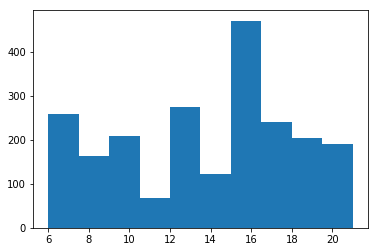

In [10]:
plt.hist(flight_df['hr_of_dep'])

In [22]:
sns.lmplot(y= 'DISTANCE', x = flight_df.,hue = 'Status',data = flight_df)

TypeError: '>' not supported between instances of 'numpy.ndarray' and 'numpy.ndarray'

In [14]:
#Drop dept time column
flight_df = flight_df.drop(['CRS_DEP_TIME'], axis=1)

In [15]:
flight_df.isnull().sum()

CARRIER          0
DEST             0
DISTANCE         0
ORIGIN           0
Weather          0
DAY_WEEK         0
DAY_OF_MONTH     0
MONTH_OF_YEAR    0
Status           0
hr_of_dep        0
dtype: int64

In [16]:
#levels of Y variable
flight_df['Status'].value_counts()/len(flight_df)

ontime     0.805543
delayed    0.194457
Name: Status, dtype: float64

#### Imbalanced dataset

## Splitting the dataset

In [ ]:
#Create dataframes for X and Y variables
x = flight_df.drop(["Status"], axis=1)
y = flight_df[['Status']]
print(x.shape)
print(y.shape)

In [ ]:
##Convert x to dummy variables
x=pd.get_dummies(x)

In [ ]:
x.columns

In [ ]:
##Train test split
from sklearn.model_selection import train_test_split
seed = 7
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 123)

In [ ]:
X_train.shape,X_test.shape

## Model1:- Criterion='gini'

In [ ]:
model_gini=DecisionTreeClassifier()

In [ ]:
model_gini.fit(X_train, y_train)


In [ ]:
preds_gini = model_gini.predict(X_test)

## Evaluation Metrics

In [ ]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_gini = confusion_matrix(y_test,preds_gini)

print("confusion matrix = \n",mat_gini)                                    # positive class decided based on weights 

In [ ]:
#Calculate accuracy
print(accuracy_score(y_test,preds_gini))

In [ ]:
print(metrics.classification_report(y_test,preds_gini))

## Model1:- Criterion='entropy'

In [ ]:
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [ ]:
model_entropy.fit(X_train, y_train)

In [ ]:
preds_entropy = model_entropy.predict(X_test)
preds_entropy_train = model_entropy.predict(X_train)

In [ ]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_gini = confusion_matrix(y_test,preds_entropy)

print("confusion matrix = \n",mat_gini)

## Evaluation Metrics

In [ ]:
print(accuracy_score(y_test,preds_entropy))
print(accuracy_score(y_train,preds_entropy_train))

#### Accuracy of train data is 100% whereas accuracy of test data is only 63% indicating an overfit model

In [ ]:
print(metrics.classification_report(y_test,preds_entropy))

In [ ]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_entropy = confusion_matrix(y_test,preds_entropy)

print("confusion matrix = \n",mat_entropy)

## Visualizing the tree

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

In [ ]:
feature_cols = x.columns

### Tree from entropy

In [ ]:
dot_data = StringIO()
export_graphviz(model_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('delay_entropy.png')
Image(graph.create_png())

https://www.youtube.com/watch?v=f85ARatXIFA

#### The tree is overgrown due to which there is overfitting - we will now prune the tree and re-evaluate the model

## Pruning

In [ ]:
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

In [ ]:
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('delay_pruned.png')
Image(graph.create_png())

In [ ]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [ ]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_pruned = confusion_matrix(y_test,preds_pruned)

print("confusion matrix = \n",mat_pruned)

In [ ]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

In [ ]:
print(metrics.classification_report(y_test,preds_pruned))

## Calculating feature importance

In [ ]:
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))

In [ ]:
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False).head(10)